In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [2]:
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data = df.copy()

In [5]:
data.drop(columns=['UDI', 'Product ID'], axis=1, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [7]:
data.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [9]:
def convert_kelvin_to_celcius(data):
    return data - 272.15

In [10]:
convert_unit_cols = ['Air temperature [K]', 'Process temperature [K]']
for col in convert_unit_cols:
    data[col] = data[col].apply(convert_kelvin_to_celcius)

In [11]:
data.rename(columns={'Air temperature [K]': 'Air temperature [C]', 'Process temperature [K]': 'Process temperature [C]'}, inplace=True)

In [12]:
data.head()

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [C]      10000 non-null  float64
 2   Process temperature [C]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [C],10000.0,27.85493,2.000259,23.15,26.15,27.95,29.35,32.35
Process temperature [C],10000.0,37.85556,1.483734,33.55,36.65,37.95,38.95,41.65
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.00,1423.00,1503.00,1612.00,2886.00
Torque [Nm],10000.0,39.98691,9.968934,3.80,33.20,40.10,46.80,76.60
Tool wear [min],10000.0,107.95100,63.654147,0.00,53.00,108.00,162.00,253.00
Target,10000.0,0.03390,0.180981,0.00,0.00,0.00,0.00,1.00


<AxesSubplot:xlabel='Target', ylabel='count'>

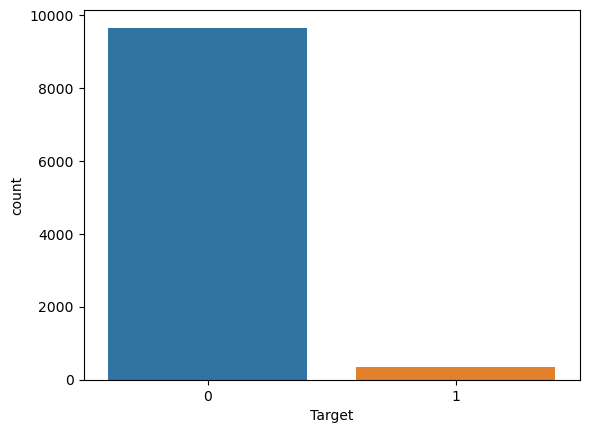

In [15]:
sns.countplot(x=data['Target'])

No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64


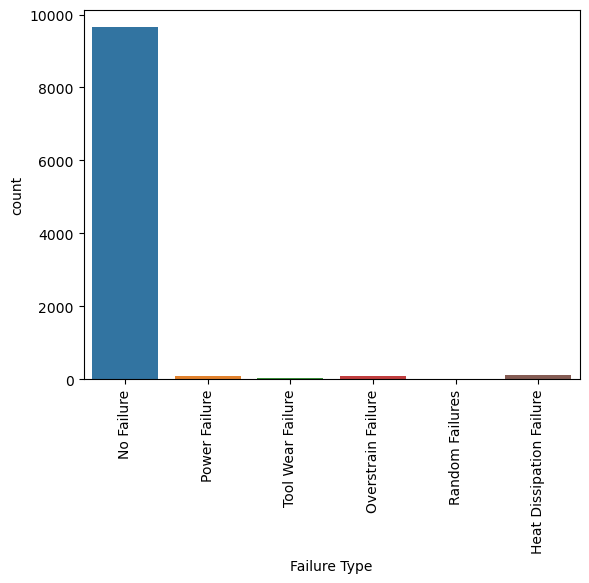

In [16]:
print(data['Failure Type'].value_counts(normalize=True) * 100)
sns.countplot(x=data['Failure Type'])
plt.xticks(rotation=90)
plt.show()

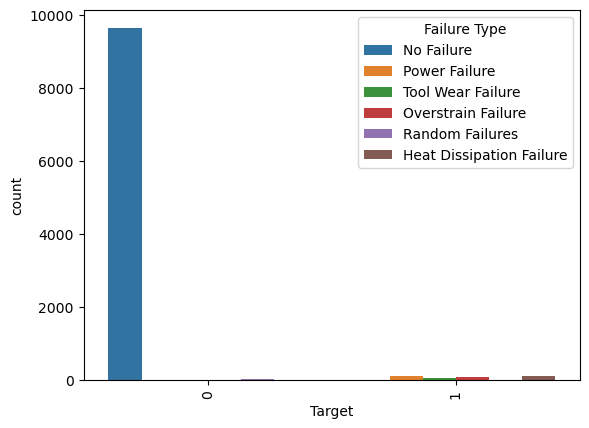

In [17]:
sns.countplot(data=data, x='Target', hue='Failure Type')
plt.xticks(rotation=90)
plt.show()

L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64


<AxesSubplot:xlabel='Type', ylabel='count'>

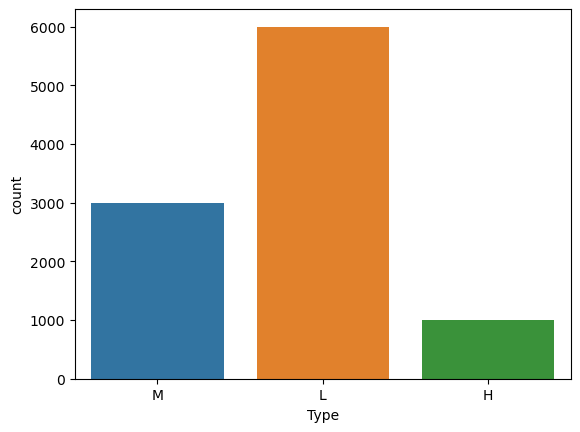

In [18]:
print(data['Type'].value_counts(normalize=True) * 100)
sns.countplot(data=data, x='Type')

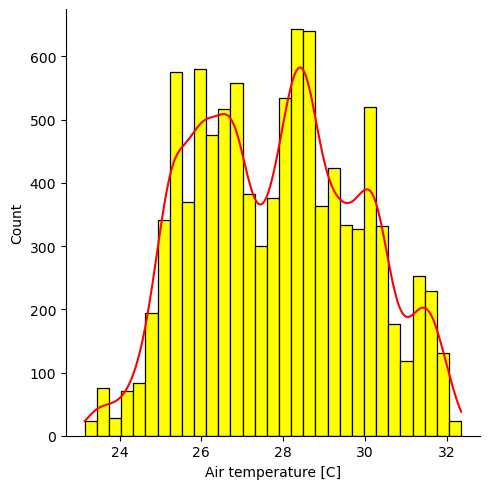

In [19]:
sns.displot(data=data, x='Air temperature [C]', kde=True, color='red', facecolor='yellow')

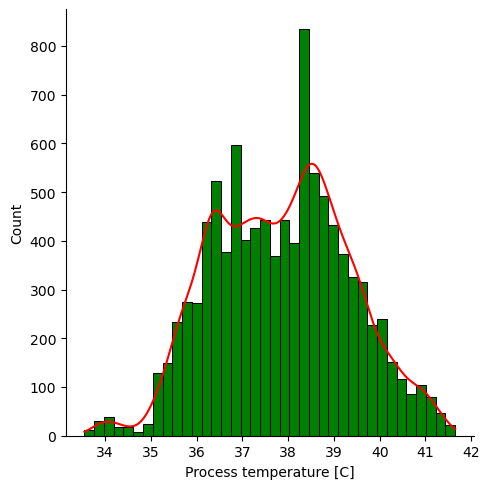

In [20]:
sns.displot(data=data, x='Process temperature [C]', kde=True, color='red', facecolor='green')

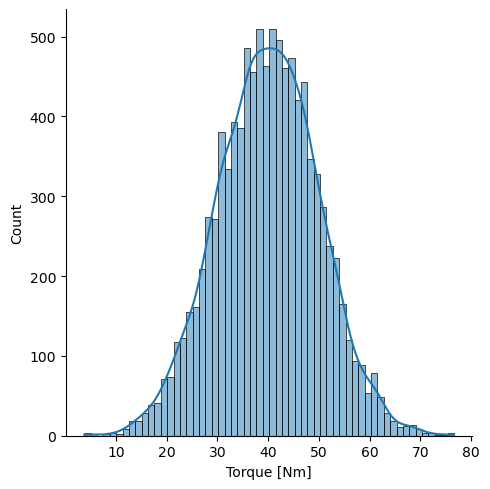

In [21]:
sns.displot(data=data, x='Torque [Nm]', kde=True)

In [22]:
data.columns

Index(['Type', 'Air temperature [C]', 'Process temperature [C]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [23]:
encoder = LabelEncoder()
data['Failure Type'] = encoder.fit_transform(data['Failure Type'])

In [24]:
encoder.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [25]:
data['Failure Type'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [26]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [27]:
data['Type'] = data['Type'].replace({'L': 0, 'M': 1, 'H': 2})

In [28]:
data.corr()

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
Type,1.000000,-0.015176,-0.012101,-0.003979,-0.003097,-0.007255,-0.036715,-0.007513
Air temperature [C],-0.015176,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.025327
Process temperature [C],-0.012101,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.004600
Rotational speed [rpm],-0.003979,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.079407
Torque [Nm],-0.003097,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.031737
Tool wear [min],-0.007255,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.111619
Target,-0.036715,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.470541
Failure Type,-0.007513,-0.025327,-0.004600,0.079407,0.031737,0.111619,0.470541,1.000000


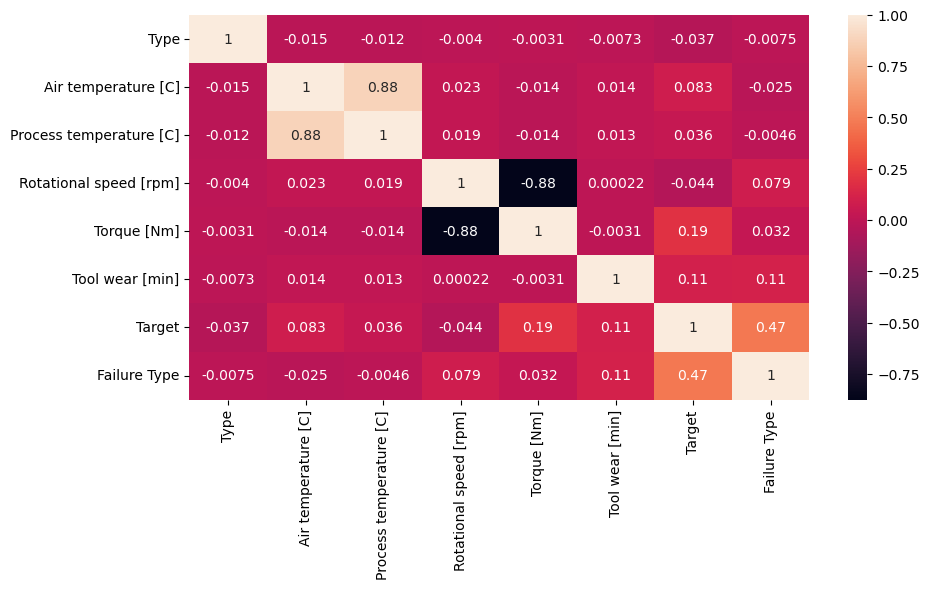

In [29]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [30]:
train, test = train_test_split(data, test_size=0.3)

In [31]:
train.shape, test.shape

((7000, 8), (3000, 8))

In [32]:
high_cor_cols = ['Rotational speed [rpm]', 'Process temperature [C]']

In [33]:
train_data = train.drop(columns=['Target', 'Failure Type', 'Rotational speed [rpm]', 'Process temperature [C]'], axis=1)
# train_data = train.drop(columns=['Target', 'Failure Type'], axis=1)
train_target = train['Failure Type']

In [34]:
test_data = test.drop(columns=['Target', 'Failure Type', 'Rotational speed [rpm]', 'Process temperature [C]'], axis=1)
# test_data = test.drop(columns=['Target', 'Failure Type'], axis=1)
test_target = test['Failure Type']

In [35]:
train_data.columns

Index(['Type', 'Air temperature [C]', 'Torque [Nm]', 'Tool wear [min]'], dtype='object')

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, random_state=42, test_size=0.3, stratify=train_target)

In [37]:
X_train.head()

,Type,Air temperature [C],Torque [Nm],Tool wear [min]
4480,2,30.55,55.2,20
341,1,25.25,32.6,22
3441,0,29.25,39.4,199
6887,0,28.65,26.9,116
6005,0,28.45,38.3,14


In [38]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

In [39]:
X_train_sc

array([[ 2.2318183 ,  1.36864747,  1.52199817, -1.39017892],
       [ 0.74312926, -1.30939437, -0.74246257, -1.35854697],
       [-0.74555977,  0.71176928, -0.0611204 ,  1.44088041],
       ...,
       [ 2.2318183 ,  0.66124019,  0.39978754,  0.09652263],
       [-0.74555977, -0.90516164,  0.29959016, -0.31469269],
       [-0.74555977, -0.80410346,  1.78251135, -0.2514288 ]])

### Model Selection

In [40]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RandomizedSearchCV

In [41]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sc, y_train)

In [42]:
models = {
    'LR': LogisticRegression(multi_class='ovr', max_iter=1000),
    'RF': RandomForestClassifier(n_estimators=100),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'G-NB': GaussianNB(),
    'B-NB': BernoulliNB(),
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

In [43]:
skfold = StratifiedKFold(n_splits=5, 
                         random_state=42, 
                         shuffle=True)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

In [44]:
# f1_micro
# f1_macro
# f1_weighted
X = X_train_sm
y = y_train_sm
for k, model in models.items():
    cv_score = cross_val_score(estimator=model, 
                               X=X, 
                               y=y, 
                               cv=skfold, 
                               scoring='f1_micro')
    print(f'Model : {k}, F1_micro_score(mean) : {cv_score.mean():.4f}')

Model : LR, F1_micro_score(mean) : 0.6467
Model : RF, F1_micro_score(mean) : 0.9869
Model : DT, F1_micro_score(mean) : 0.9778
Model : SVM, F1_micro_score(mean) : 0.9147
Model : KNN, F1_micro_score(mean) : 0.9757
Model : G-NB, F1_micro_score(mean) : 0.7922
Model : B-NB, F1_micro_score(mean) : 0.4486


In [45]:
# Hyperparameters tuning
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [46]:
tuning = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5)
tuning.fit(X, y)
print(f'Best parameters => {tuning.best_estimator_}')
print(f'Best score is : {tuning.best_score_}')

Best parameters => RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)
Best score is : 0.8336504580690628


In [47]:
best_params = tuning.best_params_
rf = RandomForestClassifier(**best_params)
rf.fit(X, y)
y_pred = rf.predict(X_val_sc)
y_pred_raw = rf.predict_proba(X_val_sc)
pd.DataFrame(classification_report(y_val, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.124183,0.826087,0.215909,23.000000
1,0.996939,0.481993,0.649817,2027.000000
2,0.226667,0.944444,0.365591,18.000000
3,0.481481,0.684211,0.565217,19.000000
4,0.002581,0.500000,0.005135,4.000000
5,0.066667,0.666667,0.121212,9.000000
accuracy,0.492381,0.492381,0.492381,0.492381
macro avg,0.316420,0.683900,0.320480,2100.000000
weighted avg,0.970233,0.492381,0.638370,2100.000000


In [48]:
y_pred_max = np.argmax(y_pred_raw, axis=1)

In [49]:
pd.DataFrame(classification_report(y_val, y_pred_max, output_dict=True)).T

,precision,recall,f1-score,support
0,0.124183,0.826087,0.215909,23.000000
1,0.996939,0.481993,0.649817,2027.000000
2,0.226667,0.944444,0.365591,18.000000
3,0.481481,0.684211,0.565217,19.000000
4,0.002581,0.500000,0.005135,4.000000
5,0.066667,0.666667,0.121212,9.000000
accuracy,0.492381,0.492381,0.492381,0.492381
macro avg,0.316420,0.683900,0.320480,2100.000000
weighted avg,0.970233,0.492381,0.638370,2100.000000


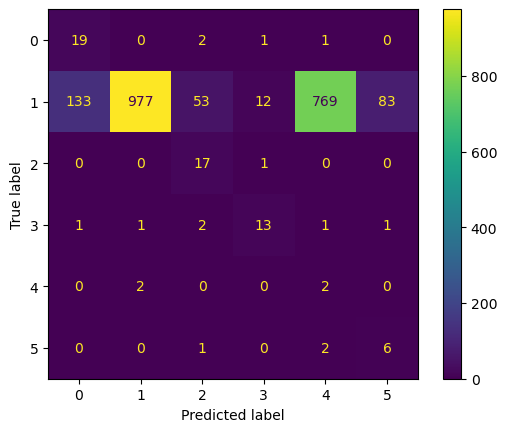

In [50]:
plot_confusion_matrix(rf, X_val_sc, y_val)

### Evaluate with Test data

In [51]:
test_data_scaled = scaler.transform(test_data)
y_test_pred = rf.predict(test_data_scaled)
pd.DataFrame(classification_report(test_target, y_test_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.122549,0.735294,0.210084,34.000000
1,0.993530,0.477375,0.644890,2895.000000
2,0.220930,0.950000,0.358491,20.000000
3,0.511111,0.741935,0.605263,31.000000
4,0.000894,0.166667,0.001779,6.000000
5,0.076923,0.857143,0.141176,14.000000
accuracy,0.487333,0.487333,0.487333,0.487333
macro avg,0.320990,0.654736,0.326947,3000.000000
weighted avg,0.967260,0.487333,0.634007,3000.000000


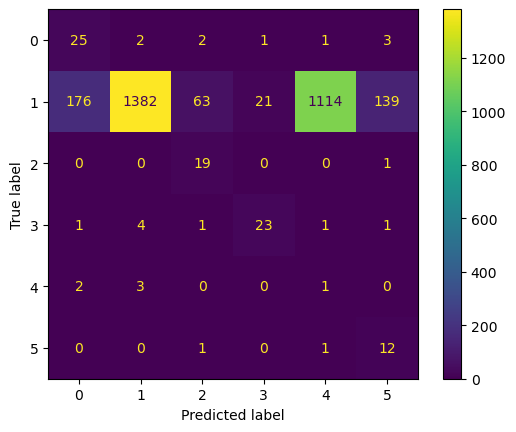

In [52]:
plot_confusion_matrix(rf, test_data_scaled, test_target)

## Save model

In [53]:
import pickle

In [54]:
filename = 'mpm-model.sav'
filename_scaler = 'mpm-scaler.sav'
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(scaler, open(filename_scaler, 'wb'))

In [55]:
# Test load model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open(filename_scaler, 'rb'))
y_test_pred = loaded_model.predict(test_data_scaled)
pd.DataFrame(classification_report(test_target, y_test_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.122549,0.735294,0.210084,34.000000
1,0.993530,0.477375,0.644890,2895.000000
2,0.220930,0.950000,0.358491,20.000000
3,0.511111,0.741935,0.605263,31.000000
4,0.000894,0.166667,0.001779,6.000000
5,0.076923,0.857143,0.141176,14.000000
accuracy,0.487333,0.487333,0.487333,0.487333
macro avg,0.320990,0.654736,0.326947,3000.000000
weighted avg,0.967260,0.487333,0.634007,3000.000000
